# DoH detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [2]:
df = pd.read_csv("../final_datasets/doh_cic.csv")

In [3]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,192.168.20.144,1.1.1.1.,35784,443,1.585702e+09,1.585702e+09,True,166,0,...,143.145326,19.221764,0.169912,49.012083,288.456537,1.748221,2.384186e-05,15.104457,0.884848,1.0
1,1,1.1.1.1,192.168.20.144.,443,35784,1.585702e+09,1.585702e+09,True,248,0,...,252.978435,159.874916,0.159045,45.877504,288.457000,1.167842,2.861023e-06,15.141317,1.514170,1.0
2,2,192.168.20.144,1.1.1.1.,36080,443,1.585702e+09,1.585702e+09,True,239,0,...,169.865034,40.395304,0.133629,38.541851,288.424106,1.211866,1.883507e-05,15.104759,0.764706,1.0
3,3,1.1.1.1,192.168.20.144.,443,36080,1.585702e+09,1.585702e+09,True,372,0,...,217.774576,235.902877,0.124814,35.999223,288.423932,0.777423,1.907349e-06,15.113732,1.568733,1.0
4,4,192.168.20.144,1.1.1.1.,36106,443,1.585702e+09,1.585702e+09,True,197,0,...,163.634265,17.918230,0.139856,40.349411,288.505911,1.471969,3.600121e-05,15.180108,0.846939,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991355,991355,192.168.20.191,52.50.215.119.,53994,443,1.578933e+09,1.578933e+09,False,12,0,...,229.465684,3.555866,0.222636,0.604286,2.714241,0.246749,1.499653e-04,2.305230,1.454545,1.0
991356,991356,193.200.65.5,192.168.20.191.,443,53993,1.578933e+09,1.578933e+09,False,9,0,...,934.025041,1.040113,0.155874,0.419432,2.690845,0.336356,0.000000e+00,2.416939,1.500000,1.0
991357,991357,52.50.215.119,192.168.20.191.,443,53994,1.578933e+09,1.578933e+09,False,11,0,...,755.067246,1.811262,0.145677,0.381092,2.616012,0.261601,9.536743e-07,2.266145,1.400000,1.0
991358,991358,192.168.20.191,85.194.242.103.,53996,443,1.578933e+09,1.578933e+09,False,9,0,...,273.781949,2.184689,0.285566,0.687360,2.407005,0.300876,2.529621e-04,1.893101,1.250000,1.0


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [15]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [16]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,True,166,0,9009,0,114,86.469648,7477,-0.137329,60,650,590,75.850568,62,54.385965,143.145326,19.221764,0.169912,49.012083,288.456537,1.748221,2.384186e-05,15.104457,0.884848,1.0,1
1,True,248,0,20108,0,141,210.409125,44272,0.197517,60,3109,3049,149.226330,87,61.702128,252.978435,159.874916,0.159045,45.877504,288.457000,1.167842,2.861023e-06,15.141317,1.514170,1.0,1
2,True,239,0,13795,0,117,122.715117,15059,0.023841,60,1271,1211,104.884716,69,58.974359,169.865034,40.395304,0.133629,38.541851,288.424106,1.211866,1.883507e-05,15.104759,0.764706,1.0,1
3,True,372,0,26999,0,132,173.000000,29929,0.134426,60,3109,3049,131.060606,71,53.787879,217.774576,235.902877,0.124814,35.999223,288.423932,0.777423,1.907349e-06,15.113732,1.568733,1.0,1
4,True,197,0,11992,0,120,110.575766,12228,-0.040873,60,697,637,92.146472,69,57.500000,163.634265,17.918230,0.139856,40.349411,288.505911,1.471969,3.600121e-05,15.180108,0.846939,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991355,False,12,0,1168,0,157,174.462030,30437,0.052682,60,577,517,111.122312,124,78.980892,229.465684,3.555866,0.222636,0.604286,2.714241,0.246749,1.499653e-04,2.305230,1.454545,1.0,0
991356,False,9,0,5915,0,717,634.621147,402744,-0.060948,60,1520,1460,88.510620,567,79.079498,934.025041,1.040113,0.155874,0.419432,2.690845,0.336356,0.000000e+00,2.416939,1.500000,1.0,0
991357,False,11,0,4608,0,478,612.249132,374850,0.123136,60,1520,1460,128.085593,510,106.694561,755.067246,1.811262,0.145677,0.381092,2.616012,0.261601,9.536743e-07,2.266145,1.400000,1.0,0
991358,False,9,0,1073,0,179,219.522208,48190,0.101681,60,577,517,122.638105,171,95.530726,273.781949,2.184689,0.285566,0.687360,2.407005,0.300876,2.529621e-04,1.893101,1.250000,1.0,0


In [17]:
print(f"DoH: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

DoH: 302627	clear: 688733


In [18]:
df = df[["LABEL_code"] + features].copy()

In [19]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [20]:
print(f"DoH: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

DoH: 302627	clear: 688733


In [21]:
df_validation = df.sample(n=100000)
df_features =  df[~df.isin(df_validation)].dropna()

In [22]:
len(df_features)

891360

In [23]:
len(df_features)*0.7

623952.0

In [24]:
len(df_features)*0.3

267408.0

In [25]:
df_features

,LABEL_code,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,1.0,166.0,0.0,9009.0,0.0,114.0,86.469648,7477.0,-0.137329,60.0,650.0,590.0,75.850568,62.0,54.385965,143.145326,19.221764,0.169912,49.012083,288.456537,1.748221,2.384186e-05,15.104457,0.884848,1.0
1,1.0,248.0,0.0,20108.0,0.0,141.0,210.409125,44272.0,0.197517,60.0,3109.0,3049.0,149.226330,87.0,61.702128,252.978435,159.874916,0.159045,45.877504,288.457000,1.167842,2.861023e-06,15.141317,1.514170,1.0
2,1.0,239.0,0.0,13795.0,0.0,117.0,122.715117,15059.0,0.023841,60.0,1271.0,1211.0,104.884716,69.0,58.974359,169.865034,40.395304,0.133629,38.541851,288.424106,1.211866,1.883507e-05,15.104759,0.764706,1.0
3,1.0,372.0,0.0,26999.0,0.0,132.0,173.000000,29929.0,0.134426,60.0,3109.0,3049.0,131.060606,71.0,53.787879,217.774576,235.902877,0.124814,35.999223,288.423932,0.777423,1.907349e-06,15.113732,1.568733,1.0
5,1.0,322.0,0.0,23446.0,0.0,132.0,182.814113,33422.0,0.161410,60.0,3109.0,3049.0,138.495540,73.0,55.303030,225.737563,218.502576,0.121839,35.151286,288.505909,0.898772,9.536743e-07,30.208026,1.570093,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991355,0.0,12.0,0.0,1168.0,0.0,157.0,174.462030,30437.0,0.052682,60.0,577.0,517.0,111.122312,124.0,78.980892,229.465684,3.555866,0.222636,0.604286,2.714241,0.246749,1.499653e-04,2.305230,1.454545,1.0
991356,0.0,9.0,0.0,5915.0,0.0,717.0,634.621147,402744.0,-0.060948,60.0,1520.0,1460.0,88.510620,567.0,79.079498,934.025041,1.040113,0.155874,0.419432,2.690845,0.336356,0.000000e+00,2.416939,1.500000,1.0
991357,0.0,11.0,0.0,4608.0,0.0,478.0,612.249132,374850.0,0.123136,60.0,1520.0,1460.0,128.085593,510.0,106.694561,755.067246,1.811262,0.145677,0.381092,2.616012,0.261601,9.536743e-07,2.266145,1.400000,1.0
991358,0.0,9.0,0.0,1073.0,0.0,179.0,219.522208,48190.0,0.101681,60.0,577.0,517.0,122.638105,171.0,95.530726,273.781949,2.184689,0.285566,0.687360,2.407005,0.300876,2.529621e-04,1.893101,1.250000,1.0


In [26]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [27]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 50, 120, 20),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,90,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 600, 100),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [28]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [08:31<00:00,  5.12s/trial, best loss: -0.9337559429477019]
The best hyperparameters are :  

{'colsample_bytree': 0.6527013800546242, 'gamma': 2.0470916561745813, 'max_depth': 120.0, 'min_child_weight': 4.0, 'n_estimators': 300.0, 'reg_alpha': 0.0, 'reg_lambda': 0.22156442481773964}


In [29]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      #Split on train and test
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) # 70% training and 30% test
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            random_state=42,
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.90 & 99.90 & 99.76 & 99.83 \\


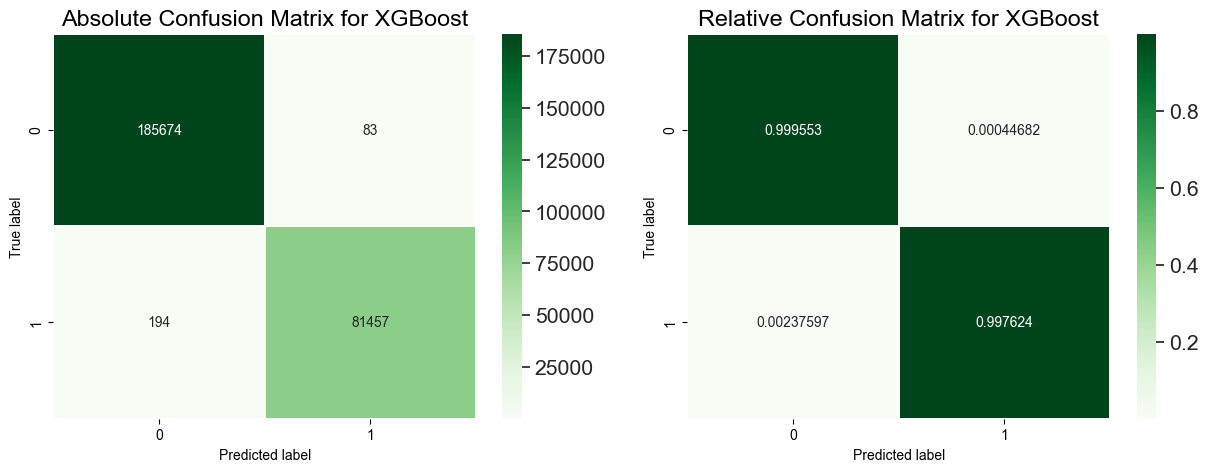

In [30]:
model = XGBoost_classification_tunned(best_hyperparams)

In [31]:

def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    i = 0
    print(f"\r{i}", end="")
    for i in range(cycles):
        print(f"\r{i}", end="", flush=True)
        tmp_f1 = 0
        tmp_str = ""
        #Split on train and test
        X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        for F, N in zip(
                [ features], # statistics_features, time_features, distribution_features, frequency_features, behavior_features, 
                [ "All"], # "Statistical-based", "Time-based", "Distribution-based",  "Frequency-based",  "Behavior-based", 
        ):
                X_train = X_train_a[F]
                X_test = X_test_a[F] 
                model = XGBClassifier(
                        n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
                        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                        colsample_bytree=int(best_hyperparams['colsample_bytree']),
                        # subsample=int(best_hyperparams['subsample']),
                        # eta=best_hyperparams['eta'],
                )
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
                precision = precision_score(y_test, y_pred)  * 100
                recall = recall_score(y_test, y_pred)  * 100
                F1 = f1_score(y_test, y_pred)  * 100
                if N == "All":
                    tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\hline"
                    tmp_str += "\n"
                    tmp_f1 = F1
                elif N in ["Statistical-based", "Distribution-based", "Behavior-based"]:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
                else:
                    tmp_str += "& \cellcolor{Gray} \\textbf{"
                    tmp_str += N
                    tmp_str += "} & \\rowcolor{LigthGray} " 
                    tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
                    tmp_str += "\n"
                    tmp_str += "\cline{2-6}"
                    tmp_str += "\n"
        if best_results[0] < tmp_f1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (tmp_f1, tmp_str, matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]

0


99.83948438955056
\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.90 & 99.89 & 99.79 & 99.84 \\
\hline



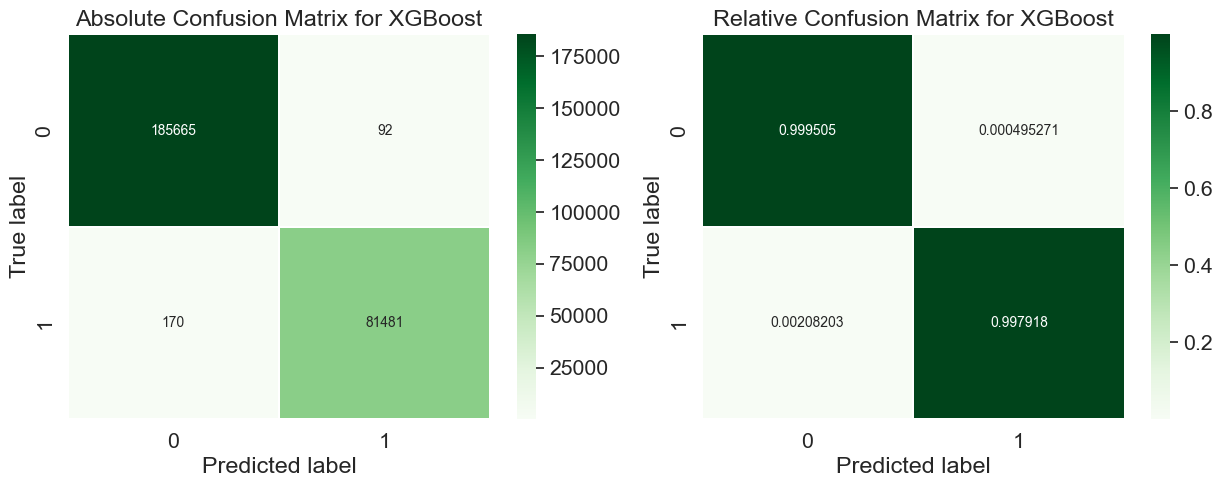

In [36]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=1)

# Validation

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.89 & 99.91 & 99.74 & 99.83 \\
\hline



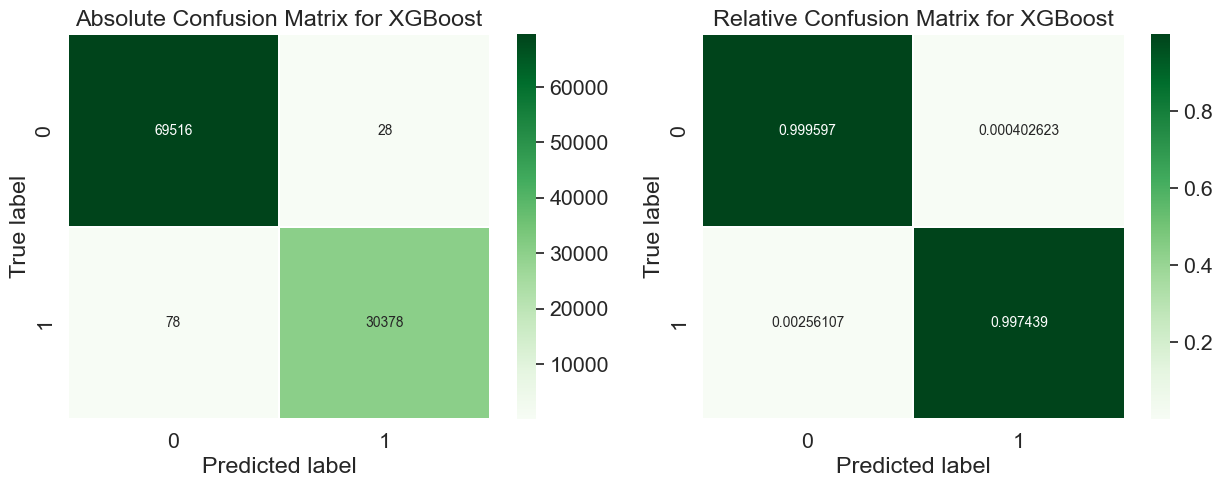

In [37]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

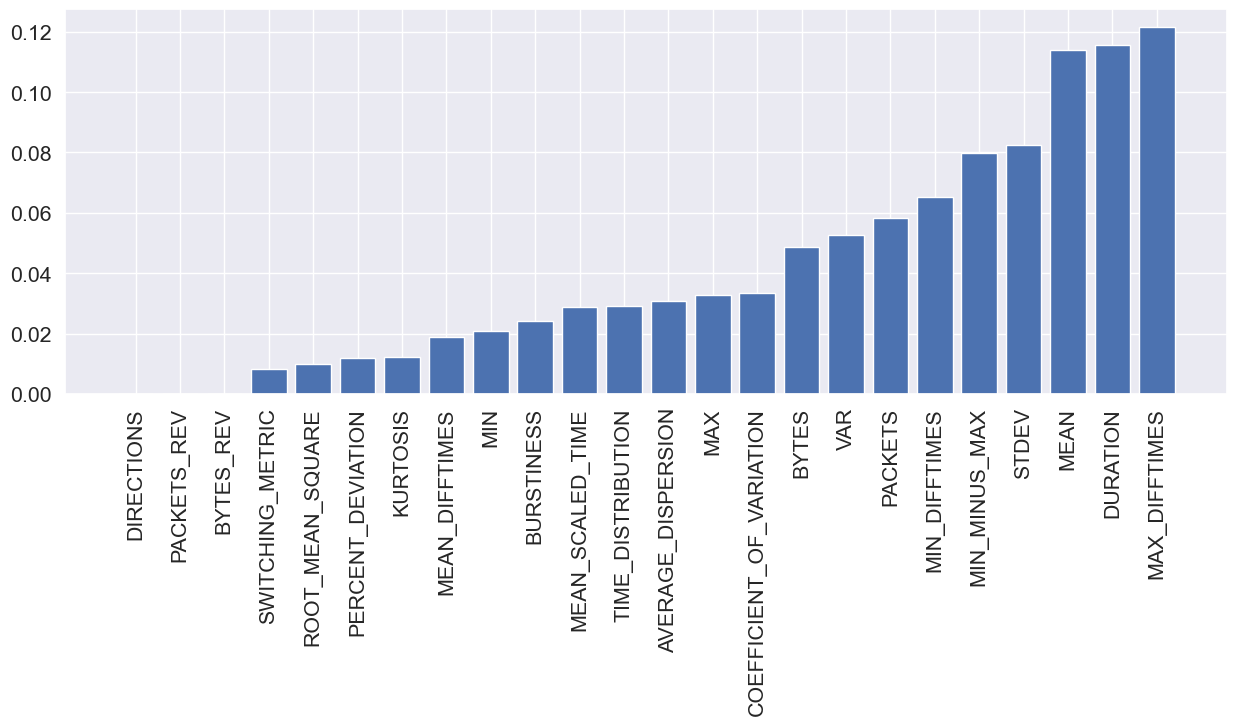

In [38]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [39]:
feat_importances.to_dict()

{'DIRECTIONS': 0.0,
 'PACKETS_REV': 0.0,
 'BYTES_REV': 0.0,
 'SWITCHING_METRIC': 0.008357284590601921,
 'ROOT_MEAN_SQUARE': 0.009901338256895542,
 'PERCENT_DEVIATION': 0.012063458561897278,
 'KURTOSIS': 0.01226130872964859,
 'MEAN_DIFFTIMES': 0.018806112930178642,
 'MIN': 0.02085125632584095,
 'BURSTINESS': 0.02420433796942234,
 'MEAN_SCALED_TIME': 0.028751138597726822,
 'TIME_DISTRIBUTION': 0.029315728694200516,
 'AVERAGE_DISPERSION': 0.03070596419274807,
 'MAX': 0.032955627888441086,
 'COEFFICIENT_OF_VARIATION': 0.03362588584423065,
 'BYTES': 0.04860759526491165,
 'VAR': 0.052697330713272095,
 'PACKETS': 0.05814346298575401,
 'MIN_DIFFTIMES': 0.06541994959115982,
 'MIN_MINUS_MAX': 0.07996068894863129,
 'STDEV': 0.08248526602983475,
 'MEAN': 0.11381062120199203,
 'DURATION': 0.11565148830413818,
 'MAX_DIFFTIMES': 0.1214241087436676}